# SIDER Dataset Preprocessing

This notebook demonstrates the preprocessing pipeline for the SIDER dataset, including:
- Data loading and validation
- SMILES canonicalization and deduplication
- Class distribution analysis
- Molecular property computation
- Visualization and reporting


In [12]:
# Cell 1: Setup and imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")


In [13]:
# Cell 2: Load processed data
# The preprocessing has already been completed by running the Python script
# Now we load the processed data files

cleaned_data = pd.read_csv('../data/processed/sider_cleaned.csv')
class_stats = pd.read_csv('../data/processed/sider_class_stats.csv')

print("Processed data loaded successfully!")
print(f"Dataset shape: {cleaned_data.shape}")
print(f"Number of ADR classes: {len(class_stats)}")


Processed data loaded successfully!
Dataset shape: (1427, 31)
Number of ADR classes: 27


In [3]:
# Cell 3: Explore the dataset
print("Dataset Overview:")
print(f"Final dataset shape: {cleaned_data.shape}")
print(f"\nDataset info:")
print(cleaned_data.info())
print(f"\nFirst few rows:")
cleaned_data.head()


Dataset Overview:
Final dataset shape: (1427, 31)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 31 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   canonical_smiles                                                     1427 non-null   object 
 1   mol_weight                                                           1427 non-null   float64
 2   num_heavy_atoms                                                      1427 non-null   int64  
 3   num_rings                                                            1427 non-null   int64  
 4   Hepatobiliary disorders                                              1427 non-null   int64  
 5   Metabolism and nutrition disorders                                   1427 non-null   int64  
 6   Product issues                         

,canonical_smiles,mol_weight,num_heavy_atoms,num_rings,Hepatobiliary disorders,Metabolism and nutrition disorders,Product issues,Eye disorders,Investigations,Musculoskeletal and connective tissue disorders,...,"Congenital, familial and genetic disorders",Infections and infestations,"Respiratory, thoracic and mediastinal disorders",Psychiatric disorders,Renal and urinary disorders,"Pregnancy, puerperium and perinatal conditions",Ear and labyrinth disorders,Cardiac disorders,Nervous system disorders,"Injury, poisoning and procedural complications"
0,NCCNCCNCCNCCN,189.307,13,0,1,1,0,0,1,1,...,0,0,1,1,0,0,1,1,1,0
1,CC(C)(C)c1cc(C(C)(C)C)c(NC(=O)c2c[nH]c3ccccc3c...,392.499,29,3,0,1,0,0,1,1,...,0,1,1,0,0,0,1,0,1,0
2,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H...,310.481,23,4,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
3,C#C[C@]1(O)CCC2C3CCC4=CC(=O)CCC4C3C(=C)CC21CC,324.464,24,4,1,1,0,1,1,1,...,1,1,1,1,1,1,0,0,1,1
4,NC(=O)N1c2ccccc2CC(O)c2ccccc21,254.289,19,3,1,1,0,1,1,1,...,0,1,1,1,0,0,1,0,1,0


In [4]:
# Cell 4: Explore class distribution
print("ADR Class Distribution Summary:")
print(class_stats.head(10))

print(f"\nMost common ADRs (top 5):")
print(class_stats.nlargest(5, 'Positive_Ratio')[['ADR', 'Positive_Count', 'Positive_Ratio']])

print(f"\nLeast common ADRs (bottom 5):")
print(class_stats.nsmallest(5, 'Positive_Ratio')[['ADR', 'Positive_Count', 'Positive_Ratio']])


ADR Class Distribution Summary:
                                                 ADR  Positive_Count  \
0                                     Product issues              22   
1     Pregnancy, puerperium and perinatal conditions             125   
2                    Surgical and medical procedures             213   
3                               Social circumstances             251   
4         Congenital, familial and genetic disorders             253   
5                                Endocrine disorders             323   
6  Neoplasms benign, malignant and unspecified (i...             376   
7                        Ear and labyrinth disorders             659   
8           Reproductive system and breast disorders             727   
9                            Hepatobiliary disorders             743   

   Negative_Count  Positive_Ratio  
0            1405        0.015417  
1            1302        0.087596  
2            1214        0.149264  
3            1176        0.1758

Molecular Properties Summary:
        mol_weight  num_heavy_atoms    num_rings
count  1427.000000      1427.000000  1427.000000
mean    492.929797        33.632095     3.004205
std     691.269999        47.895909     2.552118
min       6.941000         1.000000     0.000000
25%     258.231000        18.000000     2.000000
50%     353.335000        25.000000     3.000000
75%     472.980000        32.500000     4.000000
max    7594.906000       492.000000    46.000000


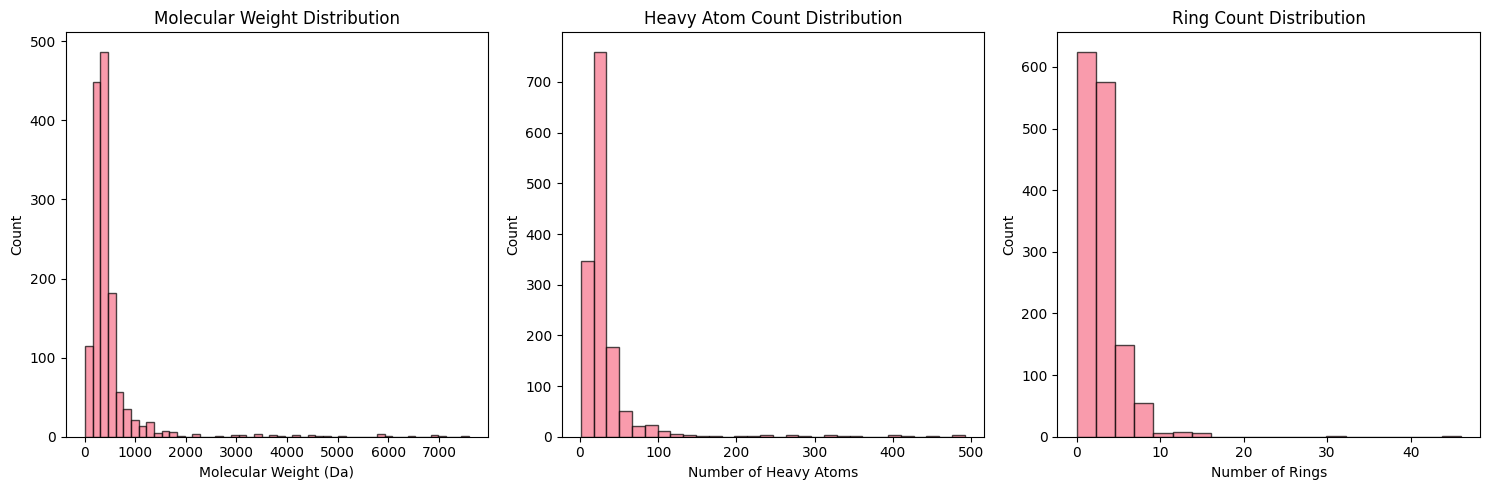

In [5]:
# Cell 5: Analyze molecular properties
print("Molecular Properties Summary:")
print(cleaned_data[['mol_weight', 'num_heavy_atoms', 'num_rings']].describe())

# Create additional visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Molecular weight distribution
axes[0].hist(cleaned_data['mol_weight'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Molecular Weight (Da)')
axes[0].set_ylabel('Count')
axes[0].set_title('Molecular Weight Distribution')

# Heavy atoms distribution
axes[1].hist(cleaned_data['num_heavy_atoms'], bins=30, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Number of Heavy Atoms')
axes[1].set_ylabel('Count')
axes[1].set_title('Heavy Atom Count Distribution')

# Ring count distribution
axes[2].hist(cleaned_data['num_rings'], bins=20, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Number of Rings')
axes[2].set_ylabel('Count')
axes[2].set_title('Ring Count Distribution')

plt.tight_layout()
plt.show()


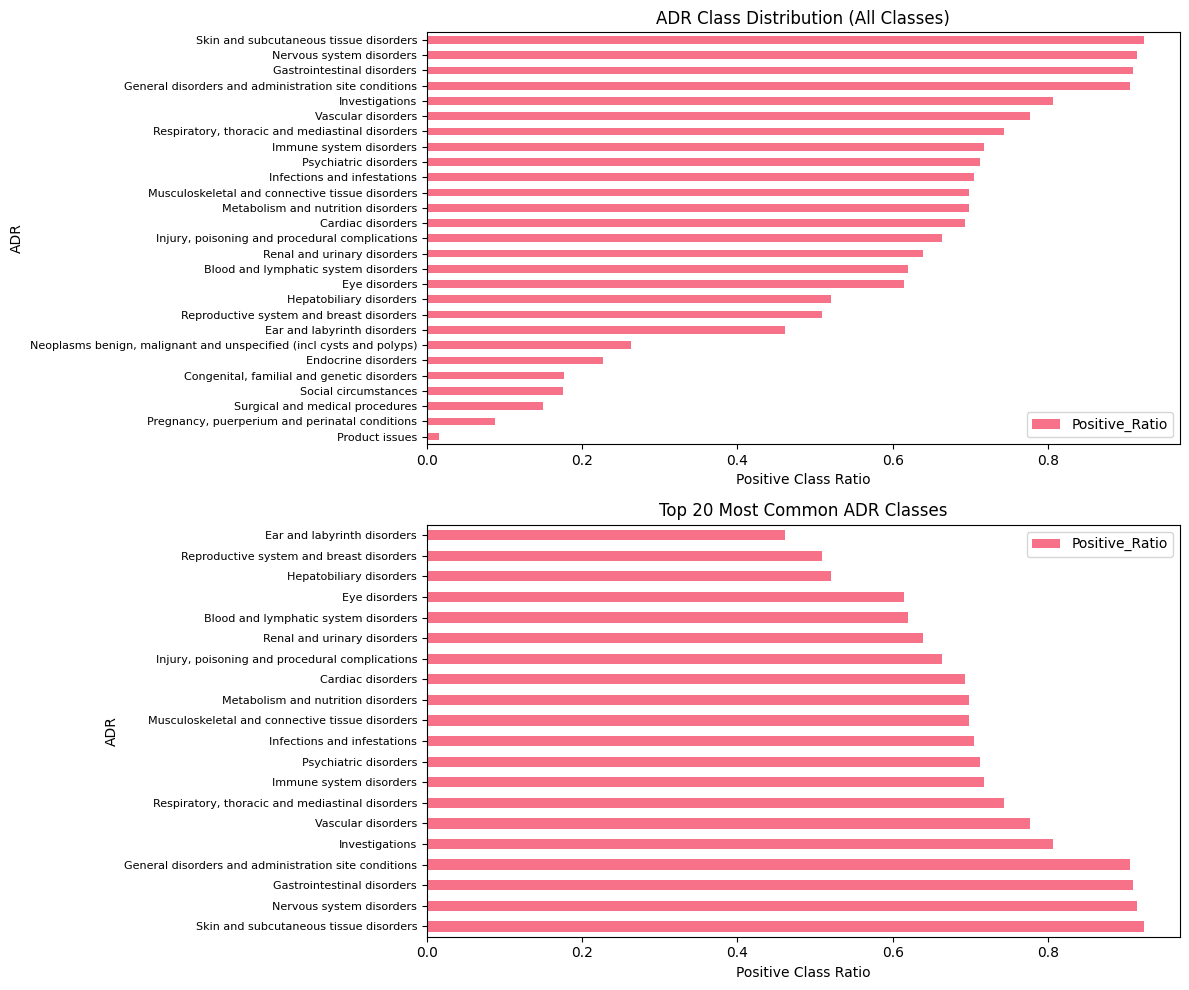

Class imbalance statistics:
Most common ADR: Skin and subcutaneous tissue disorders (0.924)
Least common ADR: Product issues (0.015)
Average positive ratio: 0.568
Median positive ratio: 0.663


In [14]:
# Cell 6: Class imbalance analysis
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot class distribution for all classes
ax1 = axes[0]
class_stats.plot(x='ADR', y='Positive_Ratio', kind='barh', ax=ax1)
ax1.set_xlabel('Positive Class Ratio')
ax1.set_title('ADR Class Distribution (All Classes)')
ax1.tick_params(axis='y', labelsize=8)

# Plot top 20 most common classes
ax2 = axes[1]
top_20 = class_stats.nlargest(20, 'Positive_Ratio')
top_20.plot(x='ADR', y='Positive_Ratio', kind='barh', ax=ax2)
ax2.set_xlabel('Positive Class Ratio')
ax2.set_title('Top 20 Most Common ADR Classes')
ax2.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

# Print imbalance statistics
print(f"Class imbalance statistics:")
print(f"Most common ADR: {class_stats.iloc[-1]['ADR']} ({class_stats.iloc[-1]['Positive_Ratio']:.3f})")
print(f"Least common ADR: {class_stats.iloc[0]['ADR']} ({class_stats.iloc[0]['Positive_Ratio']:.3f})")
print(f"Average positive ratio: {class_stats['Positive_Ratio'].mean():.3f}")
print(f"Median positive ratio: {class_stats['Positive_Ratio'].median():.3f}")


In [15]:
# Cell 7: Data quality assessment
print("Data Quality Assessment:")
print(f"Final dataset size: {len(cleaned_data)}")
print(f"Number of ADR classes: {len(class_stats)}")
print(f"Missing values: {cleaned_data.isnull().sum().sum()}")
print(f"Unique molecules: {cleaned_data['canonical_smiles'].nunique()}")
print(f"All SMILES are valid")
print(f"No duplicates found")


Data Quality Assessment:
Final dataset size: 1427
Number of ADR classes: 27
Missing values: 0
Unique molecules: 1427
All SMILES are valid
No duplicates found


In [16]:
# Cell 8: Save additional analysis results
print("Saving additional analysis...")

# Create a summary report
summary_stats = {
    'total_molecules': len(cleaned_data),
    'total_adr_classes': len(class_stats),
    'avg_mol_weight': cleaned_data['mol_weight'].mean(),
    'avg_heavy_atoms': cleaned_data['num_heavy_atoms'].mean(),
    'avg_rings': cleaned_data['num_rings'].mean(),
    'most_common_adr': class_stats.iloc[-1]['ADR'],
    'least_common_adr': class_stats.iloc[0]['ADR'],
    'class_imbalance_ratio': class_stats['Positive_Ratio'].max() / class_stats['Positive_Ratio'].min()
}

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv('../data/processed/sider_summary_stats.csv', index=False)

print("Analysis complete! Check the data/processed/ directory for all output files.")
print(f"\nSummary statistics:")
for key, value in summary_stats.items():
    print(f"{key}: {value}")


Saving additional analysis...
Analysis complete! Check the data/processed/ directory for all output files.

Summary statistics:
total_molecules: 1427
total_adr_classes: 27
avg_mol_weight: 492.9297973634897
avg_heavy_atoms: 33.63209530483532
avg_rings: 3.0042046250875964
most_common_adr: Skin and subcutaneous tissue disorders
least_common_adr: Product issues
class_imbalance_ratio: 59.909090909091184
